In [78]:
!pip install scikit-learn -U

In [79]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [80]:
#Load Data

data = pd.read_csv("C:/Users/ywuyy/OneDrive/Documents/DataEngineering/MachineLearningModels/Telecommunications Dataset Classification Model/Data/TeleCust.csv")


In [81]:
#Check For Data

data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [82]:
#Exploratory Data Analysis
data.describe().round()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,2.0,36.0,42.0,0.0,12.0,78.0,3.0,11.0,0.0,1.0,2.0,2.0
std,1.0,21.0,13.0,1.0,10.0,107.0,1.0,10.0,0.0,0.0,1.0,1.0
min,1.0,1.0,18.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0
25%,1.0,17.0,32.0,0.0,3.0,29.0,2.0,3.0,0.0,0.0,1.0,1.0
50%,2.0,34.0,40.0,0.0,9.0,47.0,3.0,8.0,0.0,1.0,2.0,3.0
75%,3.0,54.0,51.0,1.0,18.0,83.0,4.0,17.0,0.0,1.0,3.0,3.0
max,3.0,72.0,77.0,1.0,55.0,1668.0,5.0,47.0,1.0,1.0,8.0,4.0


In [83]:
data.value_counts()

region  tenure  age  marital  address  income  ed  employ  retire  gender  reside  custcat
1       1       34   1        6        18      1   0       0       1       2       1          1
3       4       30   0        0        41      2   0       0       0       2       3          1
        1       31   0        3        29      5   2       0       1       3       1          1
                59   0        4        9       1   4       1       0       1       3          1
        2       40   0        19       51      4   14      0       1       1       1          1
                                                                                             ..
2       4       36   0        0        21      2   1       0       1       3       1          1
                38   1        13       54      2   4       0       0       2       3          1
                39   0        11       38      4   1       0       0       2       4          1
                47   0        5        123   

In [84]:
data.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [85]:
data.dtypes

region     int64
tenure     int64
age        int64
marital    int64
address    int64
income     int64
ed         int64
employ     int64
retire     int64
gender     int64
reside     int64
custcat    int64
dtype: object

array([[<Axes: title={'center': 'income'}>]], dtype=object)

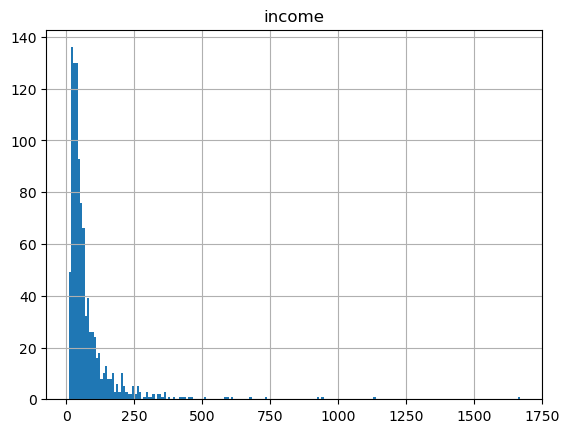

In [86]:
data.hist(column = 'income', bins =200)

In [87]:
#Feature Extraction
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [88]:
x = data[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside","custcat"]].values.astype(float)
x[0:5] #It displays first 5 rows of the data

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [89]:
print(x)

[[ 2. 13. 44. ...  0.  2.  1.]
 [ 3. 11. 33. ...  0.  6.  4.]
 [ 3. 68. 52. ...  1.  2.  3.]
 ...
 [ 3. 67. 59. ...  1.  1.  4.]
 [ 3. 70. 49. ...  1.  1.  3.]
 [ 3. 50. 36. ...  1.  3.  2.]]


In [108]:
y = data["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [107]:
#Data Normalization
# Generally data normilization is a good practice it makes the data mean zero and unit variance especailly for the algorithms like KNN which is based of data points

x = preprocessing.StandardScaler().fit_transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [175]:
#Train Test Split

#Out of sample accuracy should be high for the better accuracy of the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
print("Train_Set : ", x_train.shape, y_train.shape)
print("Test_Set : ", x_test.shape, y_test.shape)

Train_Set :  (700, 12) (700,)
Test_Set :  (300, 12) (300,)


In [176]:
#Classification (KNN)
#Import Library
from sklearn.neighbors import KNeighborsClassifier

In [177]:
#Training 
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [178]:
#Predicting
yhat = neigh.predict(x_test)
yhat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

In [179]:
#Accuracy Evaluation

from sklearn import metrics

print("Train_Set_Accuracy : ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test_Set_Accuracy : ", metrics.accuracy_score(y_test, yhat))

Train_Set_Accuracy :  0.8242857142857143
Test_Set_Accuracy :  0.71


In [180]:
print("Size of x_train:", len(x_train))
print("Size of y_train:", len(y_train))
print("Size of x_test:", len(x_test))
print("Size of y_test:", len(y_test))


Size of x_train: 700
Size of y_train: 700
Size of x_test: 300
Size of y_test: 300


In [181]:
# Let's Try For K =2
from sklearn import metrics
k =2

neigh2 = KNeighborsClassifier(n_neighbors = 2).fit(x_train, y_train)
neigh2
yhat = neigh.predict(x_test)
print("Train_Set_Accuracy : ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test_Set_Accuracy : ", metrics.accuracy_score(y_test, yhat))

Train_Set_Accuracy :  0.8242857142857143
Test_Set_Accuracy :  0.71


In [182]:
# Let's Try For K =1
from sklearn.metrics import accuracy_score

K = 1

neigh1 = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train)
y_hat = neigh.predict(x_test)

print("Train_Set_Accuracy : ", accuracy_score(y_train, neigh.predict(x_train)))

print("Test_Set_Accuracy : ", accuracy_score(y_test, yhat))


Train_Set_Accuracy :  0.8242857142857143
Test_Set_Accuracy :  0.71


In [186]:
for k in range(1, 5):  # Try k values from 1 to 20
    neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    train_accuracy = metrics.accuracy_score(y_train, neigh.predict(x_train))
    test_accuracy = metrics.accuracy_score(y_test, neigh.predict(x_test))
    print(f'k = {k}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


k = 1, Train Accuracy: 1.0000, Test Accuracy: 0.7167
k = 2, Train Accuracy: 0.8429, Test Accuracy: 0.6633
k = 3, Train Accuracy: 0.8471, Test Accuracy: 0.6933
k = 4, Train Accuracy: 0.8243, Test Accuracy: 0.7100


# As The margin between the accuracy values are less compared with other K vlaues we can consider K = 4 as our optimal K Value